### Сеть фитнес-центров «Культурист-датасаентист»
Стратегия взаимодействия с пользователями на основе аналитических данных

Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

файл с данными - `/datasets/gym_churn.csv`
- 'Churn' — факт оттока в текущем месяце;

Данные пользователя за предыдущий до проверки факта оттока месяц:
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

### Содержание работы <a id="step0"></a>   
- [Шаг 1. Общая информация](#step1) 

- [Шаг 2. Исследовательский анализ данных (EDA)](#step2)

- [Шаг 3. Mодель прогнозирования оттока пользователей](#step3)

- [Шаг 4. Kластеризацию пользователей](#step4)

- [Шаг 5. Общие выводы и базовые рекомендации по работе с клиентами](#step5)

### Общая информация <a id="step1"></a>   

Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# нормализатор
from sklearn.preprocessing import StandardScaler
# классы модели кластеризации
from scipy.cluster.hierarchy import dendrogram, linkage
# алгоритм кластеризации K-Means
from sklearn.cluster import KMeans

pd.options.display.float_format = '{:,.3f}'.format

In [2]:
# gym_churn = pd.read_csv('/datasets/gym_churn.csv')
gym_churn = pd.read_csv('C:/Users/TOSHIBA/Documents/project_python/gym_churn/gym_churn.csv')


In [3]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0


In [4]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# проверим наличие полных дубликатов
gym_churn.duplicated().sum()

0

In [6]:
#переведем названия столбцов в нижний регистр
gym_churn.columns = gym_churn.columns.str.lower()

### Вывод
Данные полные, численные значения в формате int или float, подготовки данных не требуется.

### Шаг 2. Исследовательский анализ данных (EDA)<a id="step2"></a>   


Посмотрим на датасет: изучим средние значения и стандартные отклонения 

In [7]:
# описание данных
gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000"
mean,0.510,0.845,0.487,0.308,0.903,4.681,0.412,29.184,146.944,4.323,3.725,1.879,1.767,0.265
std,0.500,0.362,0.500,0.462,0.295,4.550,0.492,3.258,96.356,4.191,3.749,0.972,1.053,0.442
min,0.000,0.000,0.000,0.000,0.000,1.000,0.000,18.000,0.148,1.000,0.000,0.000,0.000,0.000
25%,0.000,1.000,0.000,0.000,1.000,1.000,0.000,27.000,68.869,1.000,1.000,1.181,0.963,0.000
50%,1.000,1.000,0.000,0.000,1.000,1.000,0.000,29.000,136.220,1.000,3.000,1.833,1.720,0.000
75%,1.000,1.000,1.000,1.000,1.000,6.000,1.000,31.000,210.950,6.000,5.000,2.536,2.510,1.000
max,1.000,1.000,1.000,1.000,1.000,12.000,1.000,41.000,552.591,12.000,31.000,6.024,6.147,1.000


Для каждого поля заполнены все 4000 записей. 

В поле 'churn' среднее значение = 0,265, т.е 26.5% посетителей прекратили посещать клуб

 - Из среднего значениям по столбцам 'gender', 'near_location', 'partner', 'promo_friends', 'phone', group_visits' можно сказать следующее: 
- количество мужчин, чуть больше женщин - 51%,
- 85% посетителей живут или работают рядом с фитнес-центром
- партнеров - 49%, пришедших по знакомству - 31%
- номер телефона заполнен у 90% посетителей
- групповые занятия посещают 41% 

 - Для "contract_period" медианное значение - 1 месяц, у половины посетителей краткосрочные абонементы, 
 - у 'lifetime' медианное значение - 3  месяца, среднее зачение 3,72 и стандартное отклонение 3,75,то есть посетители в нашей выборке в основном занимаются от 0 до 6.5 месяца 
 - средняя частота посещений клуба = 1.9 ± 1 посещение в неделю


#### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;


In [8]:

gym_churn.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510,0.873,0.534,0.354,0.904,5.747,0.464,29.977,158.446,5.283,4.712,2.025,2.028
1,0.511,0.768,0.355,0.184,0.903,1.729,0.269,26.990,115.083,1.663,0.991,1.475,1.045


Разделив посетителей на группы , кто прекратил ходить (churn= 1) и тех, кто остался (churn= 0), можно сказать следущее:
- соотношение мужчин и женщин одинаково в обеих группах
- те кто близко живут, чаще остаются в клубе
- пользующиеся партнерскими скидками также чаще остаются, среди тех кто ушел, партнерские программы были лишь у 36%, а у тех кто остался - 53%
- те кто пришел по приглашению друга также чаще остаются
- среднее длительность абонемента у остающихся составляет 6 месяцев, у покинувших клуб - 1,7 месяца, видимо отходив пробный месяц (средний lifetime = 1 месяц), в клуб решили больше не возвращаться
- оставшиеся также более активны - они чаще посещают групповые занятия, и в неделю ходят чаще на занятия спортом (2 раза в неделю против 1,5 в неделю у тех кто ушел), причем у покинувших клуб среднее число посещений в текущем месяце падает до 1 раза в неделю. У оставшихся остается на том же уровне
- наличие контактного телефона никак не связано с оттоком 
- оставшиеся тратят на доп услуги фитнес-центра больше ушедших в среднем в 1.5 раза

#### Построим  гистограммы  для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

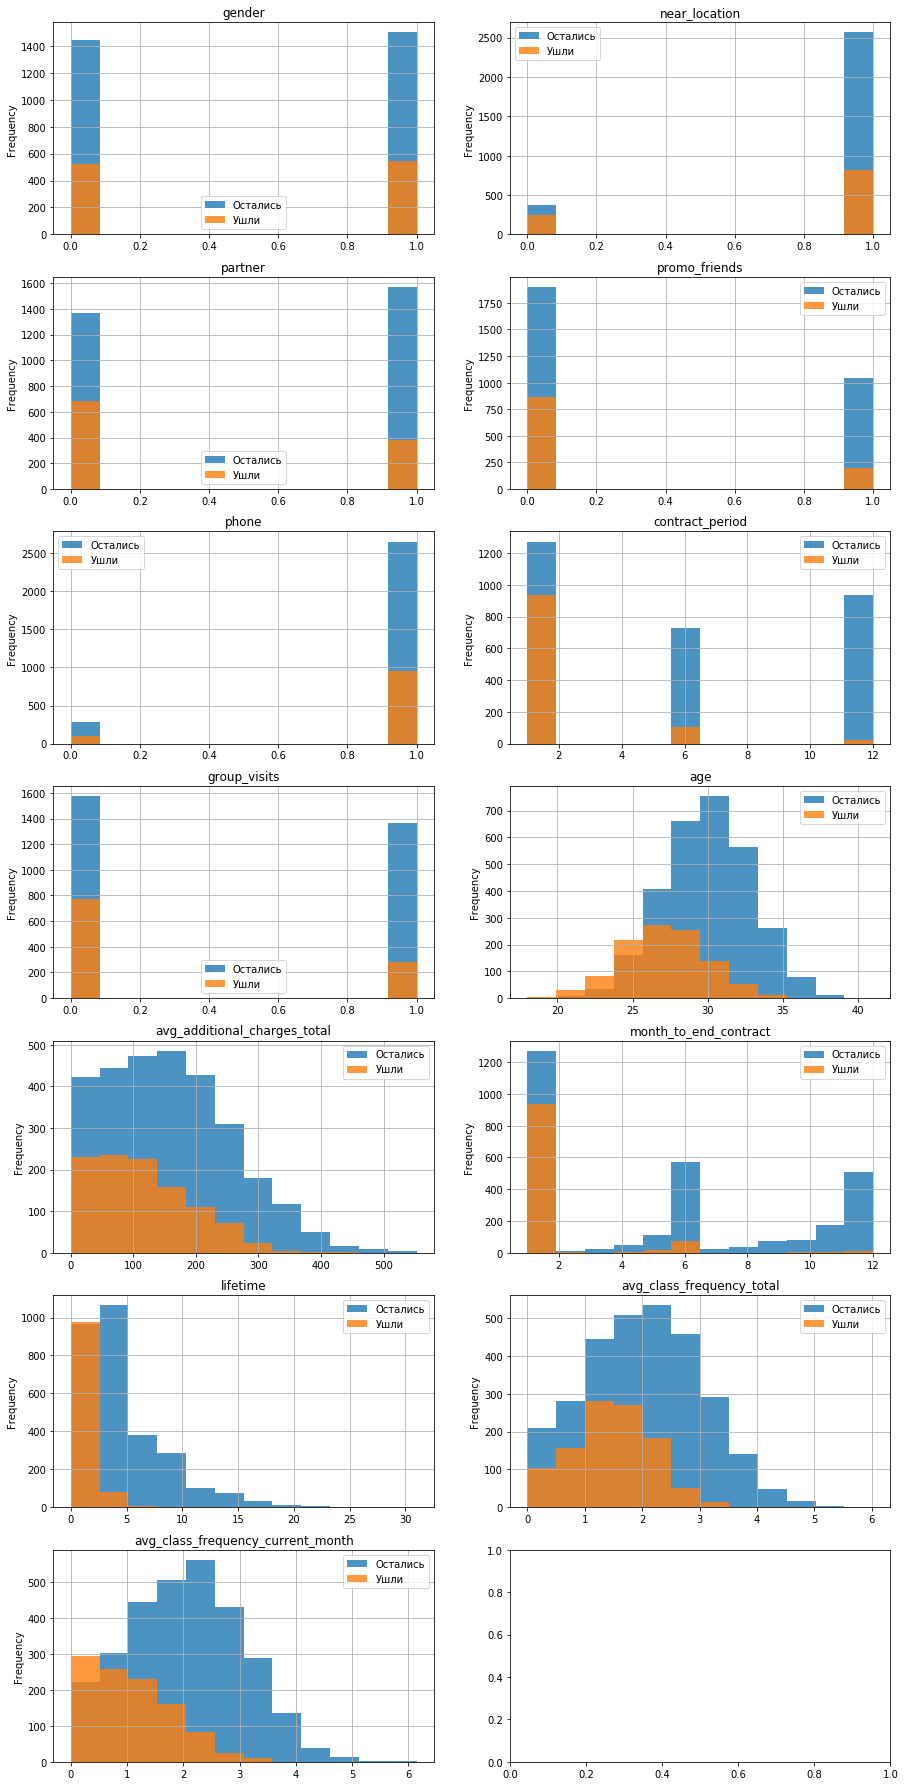

In [9]:
fig, ax = plt.subplots(7,2, figsize=(15,32))
ax = ax.ravel()
i = 0

for col in gym_churn.drop('churn', axis = 1).columns:
    #зафиксируем range, чтобы для churn=0 и churn=1 данные разбивались на одинаковые корзины
    range_hist = (gym_churn[col].min(), gym_churn[col].max())    
    gym_churn.groupby('churn')[col].plot(kind = 'hist',legend=True, ax = ax[i], grid = True,
                                         alpha = 0.8, bins = 12, 
                                         range = range_hist
                                        )     
    ax[i].legend(['Остались','Ушли'])
    ax[i].set_title(col)
    i+=1
plt.show()

На гистограммах выделются следующие факты:
- все ушедшие моложе оставшихся,
- абонемент ушедших чаще всего на 1 месяц, также как и их время посещения клуба, среди оставшихся абонемент на 6-12 месяцев
- среднее число посещений в неделю меньше, чем у оставшихся
- суммарная выручка от других услуг фитнес-центра также у оставшихся выше

#### Построим матрицу корреляций.

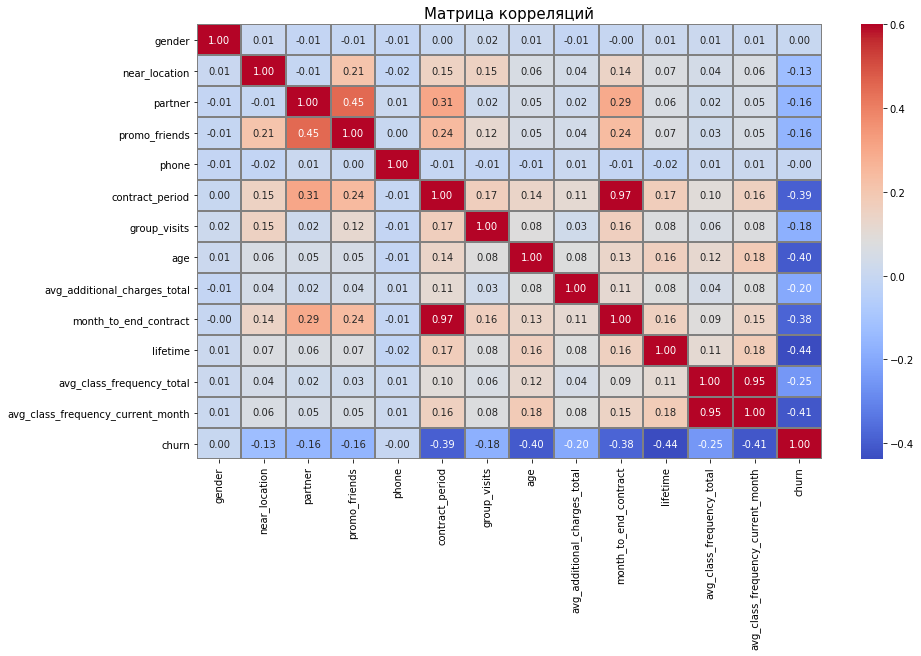

In [10]:
gym_churn.corr()
# sns.set(style='white')
plt.figure(figsize=(14, 8))
plt.title('Матрица корреляций',  fontsize = 15)
sns.heatmap(gym_churn.corr(),cmap='coolwarm',annot=True, vmax = 0.6, fmt='.2f', 
            linewidths=1, linecolor='gray');
plt.show()

- Сильная корреляция наблюдается между сроком абонемента и количеством месяцев до конца действия абонемента (коэф = 0,97), 
- также большой коэффициент корреляции (0,95) между средним количеством посещений в неделю вообще и в конкретном месяце
- есть слабая корреляция между партнерскими программами и дружескими (0,45), видимо это коллеги, и между  партнерскими программами и периодом абонемента (0,31)






Переменная churn имеет отрицательную кореляцию в диапозоне от [-0.44: -0.38] со следующими признаками: период абонемента(-0.39), возраст(-0.4), время, которое клиент уже посещает клуб(-0.44), среднее количество посещений в неделю в текущем месяце(-0.41). То есть, чем больше период купленного  абонемента, больше возраст, больше lifetime и среднее количество посещений в неделю, тем вероятнее, что клиент останется с клубом.

На churn абсолютно не влияют(коэффициент корреляции = 0): пол и наличие контактного телефона. 

У остальных признаков коэффициент кореляции с переменной churn от 0 до -0.25, их влияние на отток минимально: близость к месту проживания/работы, партнерские программы, акция "приведи  друга", посещение групповых занятий,  количество потраченных денег на допуслуги




Удалим скоррелированные признаки: month_to_end_contract, avg_class_frequency_current_month. Оставим "contract_period" и "avg_class_frequency_total". Запишем в новый датафрейм `churn_cut`

In [11]:
churn_cut = gym_churn.drop(columns = ['month_to_end_contract', 'avg_class_frequency_current_month'])


### Вывод
На отток посетителей ("churn") больше всего влияют следующие признаки (исходя из коэффициентов корреляций с полем "churn"): период абонемента, возраст, время, которое клиент уже посещает клуб, среднее количество посещений в неделю в текущем месяце. У всех этих признаков коэффициент корреляции равен около -0,4.

Длительность абонемента у большинства остающихся составляет 6-12 месяцев, у покинувших клуб чаще абонемент на 1 месяц, и гораздо режен на 6 или 12 месяцев;  
Средний lifetime у оставшихся - 5 месяцев, у ушедших средний lifetime = 1 месяц  
Большинство остающихся в возрасте - 27-33 года, ушедших -24-29 лет.  
Оставшиеся  чаще ходят на занятия спортом (2 раза в неделю против 1,5 в неделю у тех кто ушел).   Причем у покинувших клуб среднее число посещений в текущем месяце падает до 1 раза в неделю.

### Шаг 3. Модель прогнозирования оттока пользователей <a id="step3"></a>

Целевой признак — факт оттока пользователя в следующем месяце. При разделении модели на обучающую и валидационную выборку, добавим параметр stratify = y в функции train_test_split( ). Данные разделятся на два кластера (наблюдения класса 0 и наблюдения класса 1), и в валидационную выборку попадут по 20% наблюдений из каждого кластера.

In [12]:
# Разобъём данные на обучающую и валидационную выборку функцией train_test_split()
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop(columns = ['churn'])
y = gym_churn['churn']
# разделяем модель на обучающую и валидационную выборку
### добавим stratify = y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, 
                                                    stratify = y )

In [13]:
# создаём объект класса scaler (нормализатор)
scaler = StandardScaler() 
# обучаем нормализатор и стандартизируем набор данных
X_train_st = scaler.fit_transform(X_train) 
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

Мы будем обучать модель на train-выборке двумя способами:
* логистической регрессией - LogisticRegression()
* случайным лесом - RandomForestClassifier


In [14]:
models = [LogisticRegression(solver = 'lbfgs'), RandomForestClassifier(n_estimators = 100, random_state = 0)]


Создадим функцию, которая принимает на вход модель и данные и выводит метрики (accuracy_score, precision_score, recall_score из модуля sklearn.metrics). Передаем функции имя модели, обучаем ее, получаем предсказанные значения на валидационной выборке и выводим на печать метрики accuracy, precision, recall.

In [15]:
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))
    


In [16]:
# Обучим модель на LogisticRegression()
make_prediction(models[0],X_train_st, y_train, X_test_st, y_test )

	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85


In [17]:
# Обучим модель на RandomForestClassifier()
make_prediction(models[1],X_train_st, y_train, X_test_st, y_test )

	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83



Обе модели показывают очень хорошие результаты: доля правильных ответов (англ. accuracy) 0,94 (LogisticRegression) и 0,92 (RandomForest).

По всем параметрам чуть лучше себя показала логистическая регрессия: Accuracy = 0.94, Precision: 0.9, Recall: 0.85.
У случайного леса : Accuracy = 0.92, Precision: 0.88, Recall: 0.83.

In [18]:
""" Построим модель прогнозирования на данных, без 2х скоррелированных признаков"""
X = churn_cut.drop(columns = ['churn'])
y = churn_cut['churn']
# разделяем модель на обучающую и валидационную выборку добавим stratify = y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, 
                                                    stratify = y )
# создаём объект класса scaler (нормализатор)
scaler = StandardScaler() 
# обучаем нормализатор и стандартизируем набор данных
X_train_st = scaler.fit_transform(X_train) 
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)
# Обучим модель на LogisticRegression()
display("Параметры модели LogisticRegression()")
make_prediction(models[0],X_train_st, y_train, X_test_st, y_test )
# Обучим модель на RandomForestClassifier()
display('Параметры модели RandomForestClassifier()')
make_prediction(models[1],X_train_st, y_train, X_test_st, y_test )

'Параметры модели LogisticRegression()'

	Accuracy: 0.91
	Precision: 0.83
	Recall: 0.83


'Параметры модели RandomForestClassifier()'

	Accuracy: 0.89
	Precision: 0.81
	Recall: 0.79


 **<font color="gray"> <font size="4"> После удаления 2х столбцов результаты ухудшились, хотя все еще хорошие результаты</font>**


Метрики логистической регрессия: Accuracy = 0.91, Precision: 0.83, Recall: 0.83. (Старые данные Accuracy = 0.94, Precision: 0.9, Recall: 0.85)

У случайного леса : Accuracy = 0.89, Precision: 0.81, Recall: 0.79. (Старые данные : Accuracy = 0.92, Precision: 0.88, Recall: 0.83.

### Шаг 4. Кластеризация пользователей <a id="step4"></a>

Стандартизируем данные, построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму. На основании дендрограммы выделим количество кластеров, на которые можно поделить пользователей фитнес зала

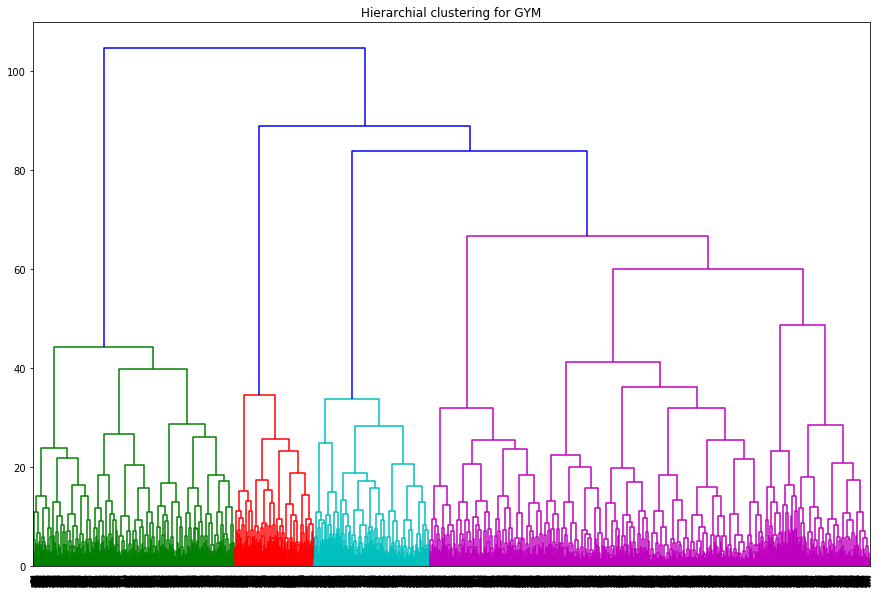

In [19]:
# создаём объект класса scaler (нормализатор)
scaler = StandardScaler() 
# обучаем нормализатор и стандартизируем набор данных
X_sc = scaler.fit_transform(gym_churn.drop(columns = ['churn'])) 
# Построим матрицу расстояний функцией linkage()
linked = linkage(X_sc, method = 'ward')
# дендрограмма
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Предложенное оптимальное число кластеров 4 — четыре разных цветов на графике.  


Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. В данной учебной  работе за число кластеров примем n=5

In [20]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_sc)
# сохраняем метки кластера в поле нашего датасета
gym_churn['cluster_km'] = labels
gym_churn.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.522,0.862,0.470,0.306,0.000,4.787,0.426,29.301,143.958,4.475,3.925,1.847,1.716,0.268
1,0.480,0.812,0.000,0.086,1.000,1.863,0.325,28.137,131.299,1.788,2.346,1.326,1.086,0.551
2,0.560,0.858,0.338,0.197,0.999,2.734,0.450,30.204,164.628,2.523,5.007,2.926,2.933,0.048
3,0.510,0.750,1.000,0.452,1.000,2.554,0.303,28.499,129.813,2.370,2.832,1.355,1.176,0.396
4,0.496,0.943,0.752,0.542,1.000,11.353,0.564,29.994,164.564,10.376,4.817,2.028,2.020,0.024


Из 5 кластеров - два с наименьшей вероятностью ухода, это кластеры №0 и №4.

В кластере №4 собрались любители спорта - в среднем у них: 
- количество посещений в неделю - 2,8; 
- посещение клуба в течение 5 месяцев; 
- жилье,работа рядом с клубом в 98%

В кластере №0 - пришедшие за компанию и возможно со скидкой
- текущий абонемент  на 11 месяцев, 
- партнерская программа у 78 %
- пришедшие через друзей 57%
- посещение клуба в течение 5 месяцев;
- количество посещений в неделю - 2,0;

Вероятнее всего уйдут посетители из кластеров №2 и №3. В кластере №3 среднее количество посещений в текущем месяце - 1,0 раз в неделю; посетители из кластера №2 - живут и работают далеко от клуба


Построим распределения признаков для кластеров. Сгруппируем `gym_churn` по кластерам и для каждого признака построим гистограмму


    
Построим гистограммы для дискретных значений: discrete = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'churn']  
Для непрерывных значений построим боксплоты: 
    continuous_gym = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
    
    

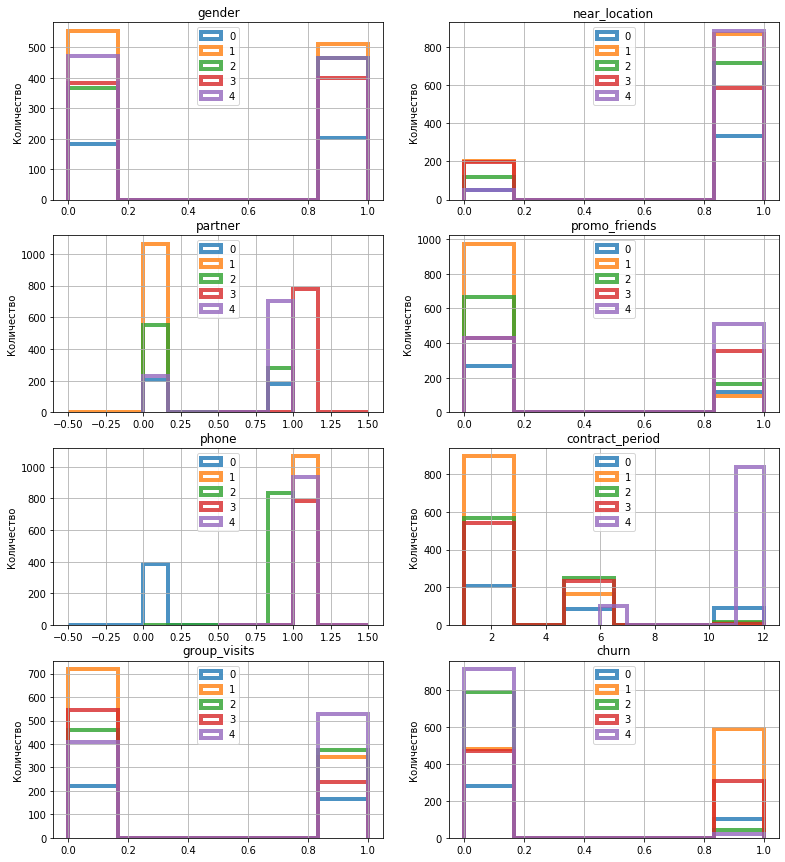

In [21]:

# список столбцов для построения гистограмм
discrete = ['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'churn']
fig, ax = plt.subplots(round(len(discrete) /2),2, figsize=(13,15))
ax = ax.ravel()


for i, col in enumerate(discrete):
    gym_churn.groupby('cluster_km')[col].plot(kind = 'hist',legend=True, ax = ax[i], grid = True,
                                              alpha = 0.8,
                                              bins = 6, 
                                              histtype = 'step',  linewidth=4
                                             )   
    ax[i].set_ylabel('Количество')
    ax[i].set_title(col)
    ax[i].legend(loc = 'upper center')

plt.show()


C:\Users\TOSHIBA\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]
C:\Users\TOSHIBA\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]
C:\Users\TOSHIBA\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]
C:\Users\TOSHIBA\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]
C:\Users\TOSHIBA\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matp

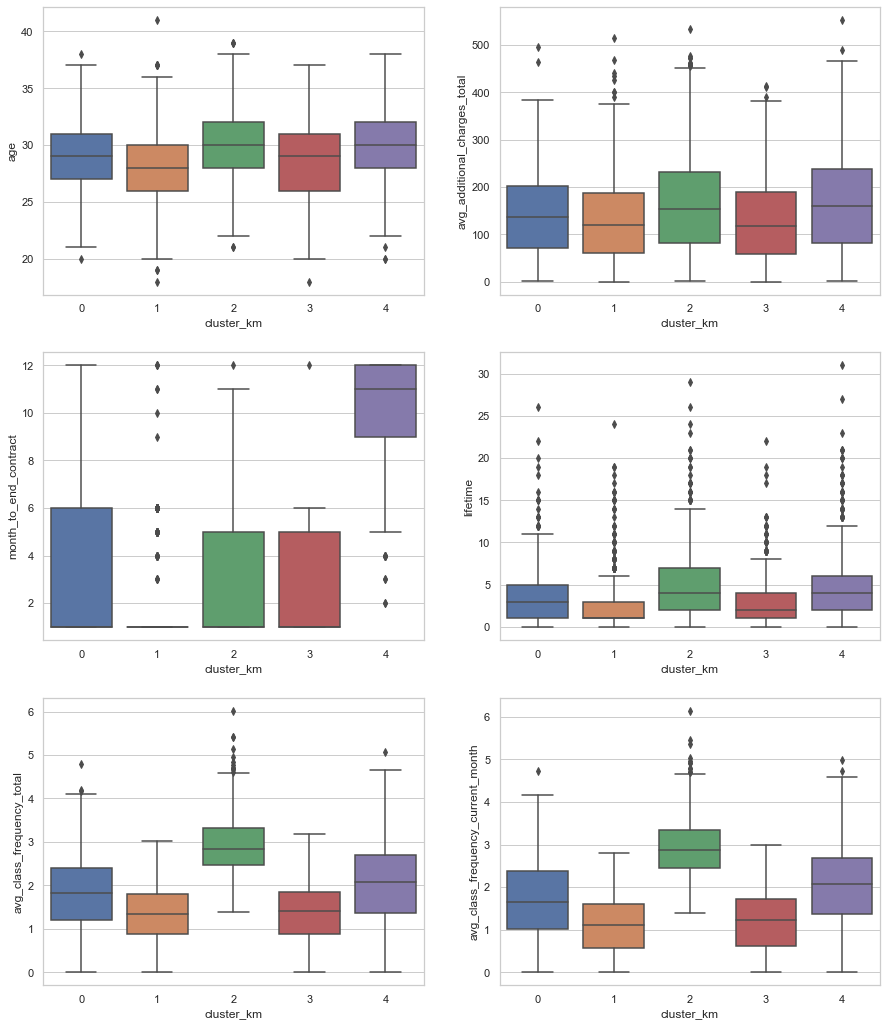

In [23]:
# для непрерывных функций построим боксплоты
# список столбцов для построения боксплот
continuous_gym = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
                  'avg_class_frequency_current_month']
sns.set(style="whitegrid")
for i, col in enumerate(continuous_gym):
    plt.subplot(round(len(continuous_gym) /2) , 2, i+1)
    fig = plt.gcf()
    fig.set_size_inches(15, 18)
    sns.boxplot(data = gym_churn, y=col,  x="cluster_km")
    
#     plt.show()
    fig.show();

Из графиков можно сделать следующие выводы:
- группа "0" - это самая стабильная группа , абонемент куплен на 12 месяцев, живут,работают рядом, 2 раза в неделю ходят в зал, активно посещают групповые занятия, среди них много пришедших по партнерским программам или через друзей, большинство в возрасте 30-35 лет;
- группа "4" - вторая по стабильности , про нее можно сказать то же, что и предыдущую группу, основные отличия - абонемент на 1 или 3 месяца, среднее количество посещений выше, в среднем до трех в неделю
- группа "3" - самая плохая группа, где количество ушедших больше оставшихся , у большинства абонементы на 1 месяц, и посещение клуба также ограничивается 1 месяцем, и посещением зала-1 раз в неделю, живут они рядом, большинство в возрасте - 25-30 лет
- в группе "2" также большой отток, она не очень многочисленна, и живут/работают клиенты далеко от клуба, в остальном их показатели средние
- группа "1" - это те, кто не оставил контактного телефона, однако ничего конкретного по ним сказать нельзя, у них средние показатели по всем признакам, да и средний churn у них 0,27, не очень большой, но и не маленький, можно было не выделять эту группу.

### Шаг 5. Общие  выводы и базовые рекомендации по работе с клиентами <a id="step5"></a>   

[К содержанию](#step0) 


В нашем распоряжении было 4000 строк с данными о клиентах фитнес-центра, данные полные, заполнены все поля. По этим данным была построены модели прогнозирования оттока пользователей. Лучше себя показала модель логистической регрессии, ее метрики Accuracy = 0.94, Precision: 0.9, Recall: 0.85.
Единственное, что можно еще собрать данные о количестве посетителей в самые загруженные часы, если людей слишком много, возможно клубу и не надо привлекать больше посетителей, а то будут уходить старые клиенты. В таком случае для увеличения прибыли можно повышать цены на абонементы.

Общие характеристики клиентов, которые склонны к оттоку клиентов:

 1) длительность абонемента и время жизни в фитнесцентре чаще всего 1 месяц, молодой возраст - от 20 до 28 лет, среднее количество посещений 1,5 раза в неделю;  
 2) живут/работают далеко от клуба

 Большой процент ушедших после первого месяца посещений клуба, надо стараться заинтересовать клиентов посещать клуб более одного месяца. Для удержания молодежи, можно добавить модные среди молодежи групповые занятия. Также сделать для них рассрочки и скидки. 

Есть посетители, которые покупают абонемент на 1 месяц, но среднее количество посещений клуба - 2-3 раза в неделю, и средний lifetime 5месяцев. Не ясно, почему они не хотят покупать годовой абонемент, который явно дешевле. Они не могут быть уверены, что будут ходить в этот клуб, а возможно цены на годовой абонемент слишком высоки. Цель - попробовать их перевести на годовой абонемент, возможно, ввести специально для них выгодные скидки на годовой абонемент, либо предложить платить в рассрочку.

Процент оставшихся в клубе выше у клиентов в возрасте старше 28 лет, эта информация может пригодиться при настройке рекламы в интернете.

Если человек живет/работает не рядом с клубом рано или поздно он уйдет, об этом также нужно помнить при настройке района для рекламы. Однако, стоит проанализировать их отдельно, почему они ходят в наш клуб и если они все из одного района, где нет удобного фитнес-центра, значит пора там открывать новый.